## Filter metrics
Objective: What patterns can we see by comparing the filter metrics and performance metrics? 

In [80]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_context('notebook')

fn = '/home/nick/tmp/model_fits.h5'
model_fits = pd.read_hdf(fn, key='df')
sorted(model_fits.keys().values)

['auto_rewarded_trial_count',
 'catch_trial_count',
 'cf_latency',
 'cf_max',
 'container_id',
 'correct_reject_trial_count',
 'donor_id',
 'engaged_trial_count',
 'equipment_name',
 'false_alarm_trial_count',
 'flash_latency',
 'flash_max',
 'full_genotype',
 'go_trial_count',
 'has_model',
 'hit_trial_count',
 'imaging_depth',
 'lick_latency',
 'lick_max',
 'max_dprime',
 'max_dprime_engaged',
 'maximum_reward_rate',
 'mean_dprime',
 'mean_dprime_engaged',
 'mean_false_alarm_rate',
 'mean_false_alarm_rate_engaged',
 'mean_hit_rate',
 'mean_hit_rate_engaged',
 'miss_trial_count',
 'model_file',
 'ophys_experiment_id',
 'reward_latency',
 'reward_max',
 'session_date',
 'session_name',
 'targeted_structure',
 'total_reward_count',
 'total_reward_volume',
 'trial_count',
 'workflow_state']

In [81]:
model_fits['session_name'][model_fits['hit_trial_count'] == 0]

11                 20190617_456564_5imagesB
12                 20190617_456564_5imagesB
17         20190213_431246_2imagesA_passive
19                 20190130_431023_2imagesA
31         20190213_423606_2imagesA_Passive
62            20190212_431018_VISp_175um_2a
64      20190213_431018_VISp_175um_5passive
90            20190214_431018_VISp_175um_6a
209                20190503_448897_2imagesA
240                20190329_440298_2imagesA
261                20190405_442709_5ImagesB
268                20190329_442709_2imagesA
297                20190301_431246_5imagesB
316        20190219_423606_5imagesB_passive
334                20190410_436662_2imagesA
340                20190410_445270_2imagesA
342                20190410_445002_2imagesA
364                20190409_442709_5imagesB
373                20190415_436662_5imagesB
383                20190510_448897_5imagesB
394                20190409_440298_5imagesB
430                20190422_445002_5imagesB
452         20190422_445270_5ima

The ones with zero hits look mostly to be the passive sessions, so I am going to remove them.

In [82]:
print(len(model_fits))
model_fits = model_fits.query('hit_trial_count > 0').copy()
print(len(model_fits))

90
58


## Filter metrics
First let's plot the filter metrics against themselves. 

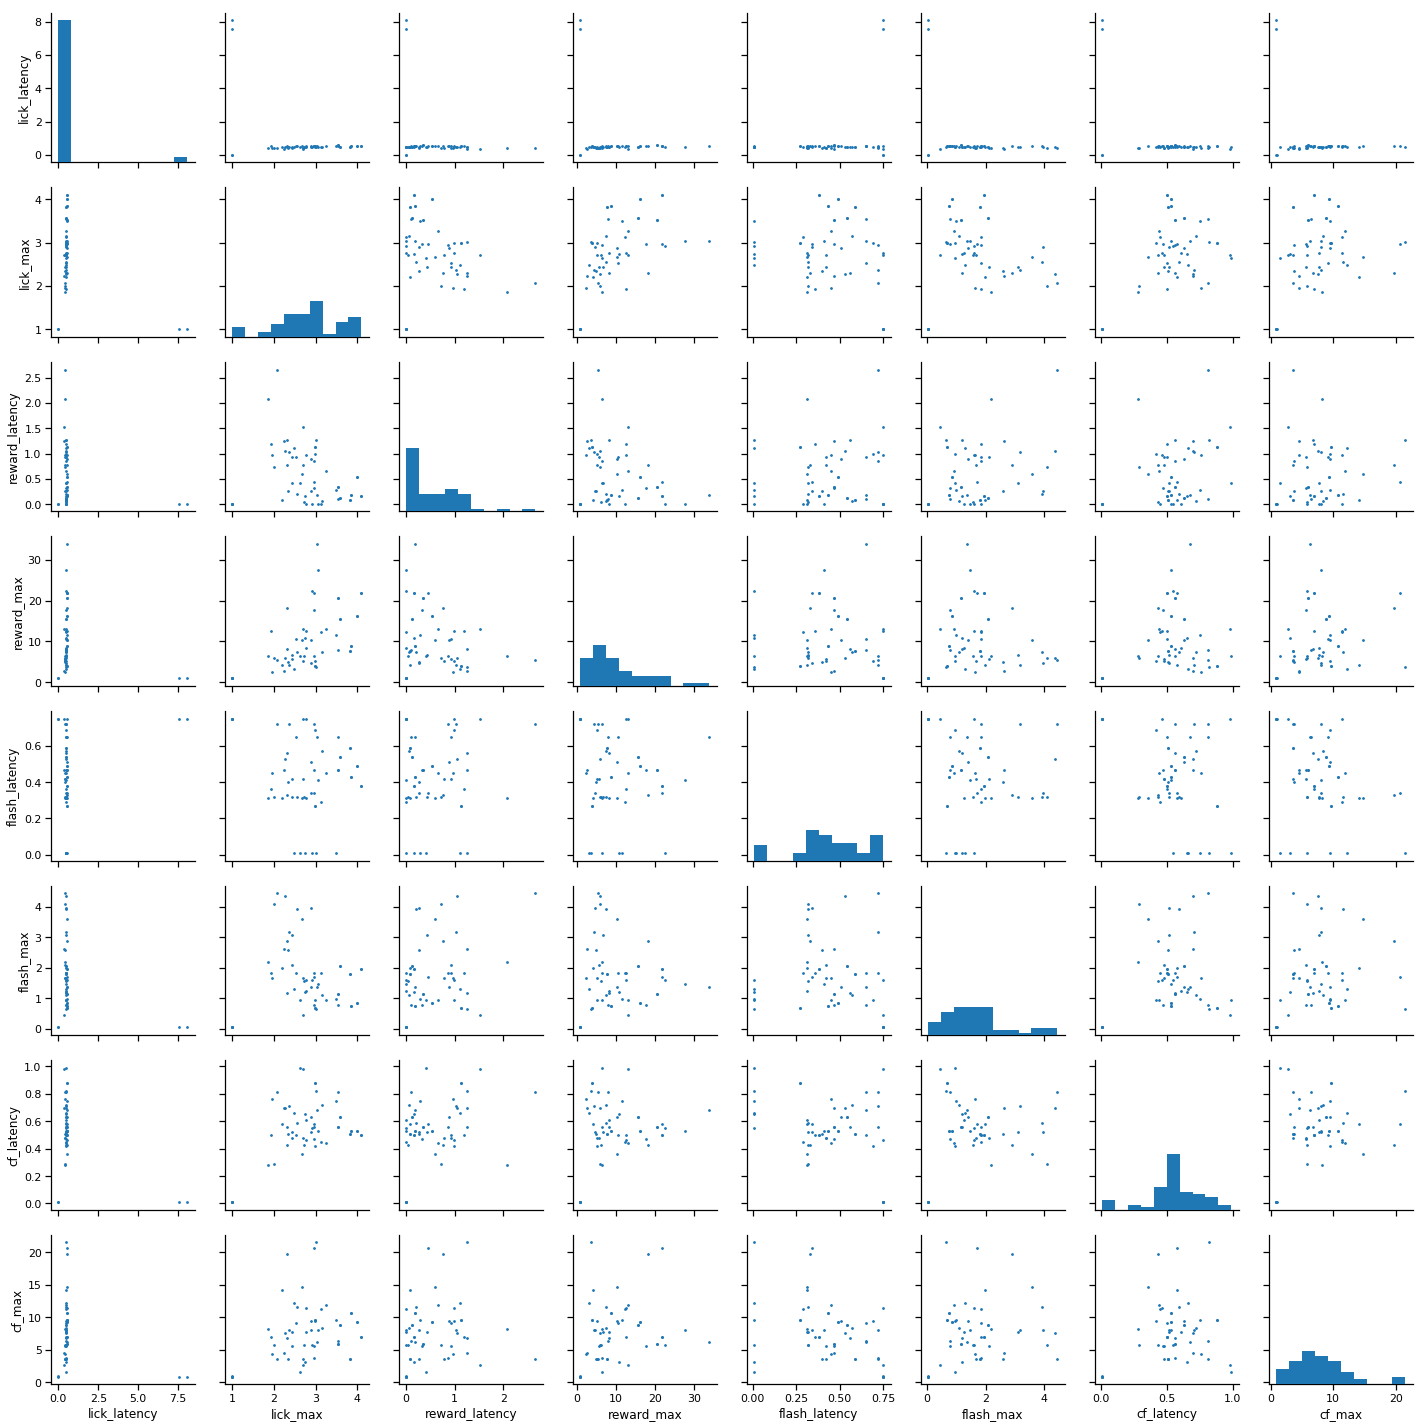

In [73]:
metrics = ['lick_latency', 'lick_max', 'reward_latency', 'reward_max',
  'flash_latency', 'flash_max', 'cf_latency', 'cf_max']

g = sns.PairGrid(model_fits, vars=metrics)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, s=3);
plt.show()

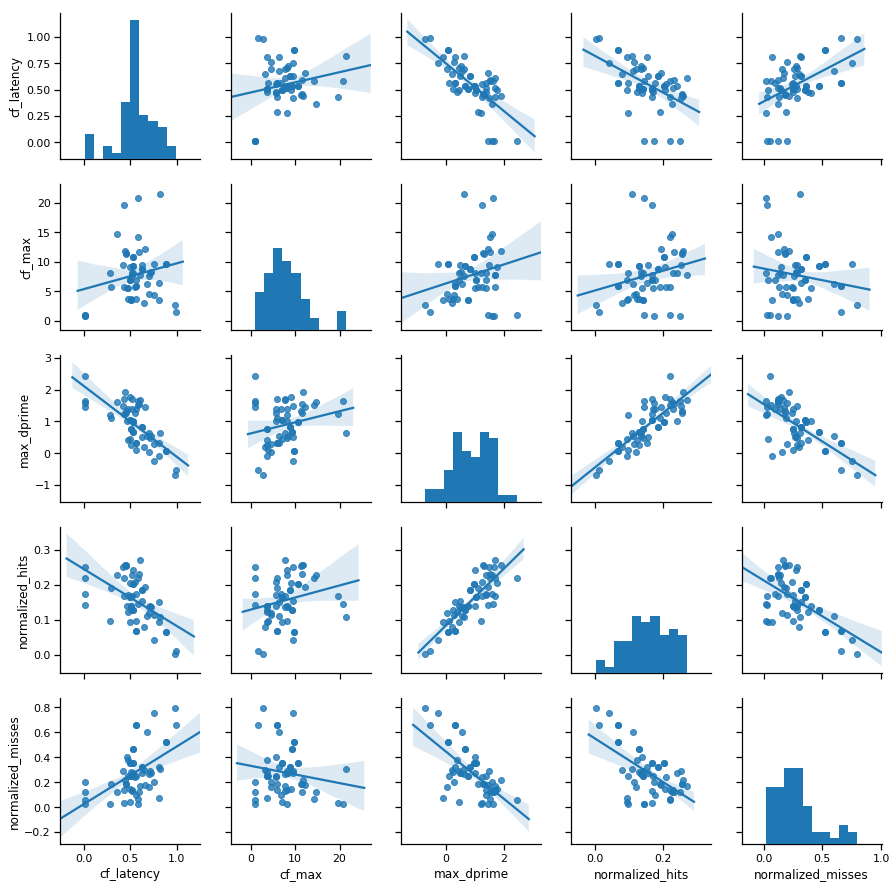

In [86]:
model_fits['normalized_misses'] = model_fits['miss_trial_count'] / model_fits['trial_count']
model_fits['normalized_hits'] = model_fits['hit_trial_count'] / model_fits['trial_count']

metrics = ['cf_latency',
           'cf_max',
          'max_dprime',
          'normalized_hits',
          'normalized_misses']

g = sns.PairGrid(model_fits, vars=metrics)
g.map_diag(plt.hist)
g.map_offdiag(sns.regplot);
#g.map_offdiag(plt.scatter, s=3);
plt.show()

Text(11.25, 0.5, "Max d'")

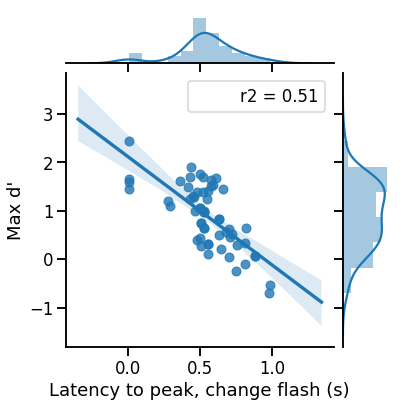

In [98]:
sns.set_context('talk')
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x='cf_latency', y='max_dprime', data=model_fits, kind='reg', stat_func=r2)
plt.xlabel('Latency to peak, change flash (s)')
plt.ylabel("Max d'")

Text(11.25, 0.5, "Max d'")

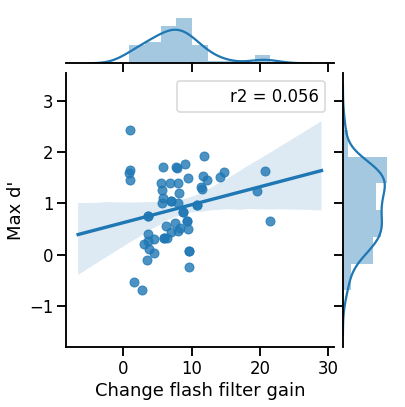

In [99]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x='cf_max', y='max_dprime', data=model_fits, kind='reg', stat_func=r2)
plt.xlabel('Change flash filter gain')
plt.ylabel("Max d'")

Text(11.25, 0.5, 'Mean false alarm rate')

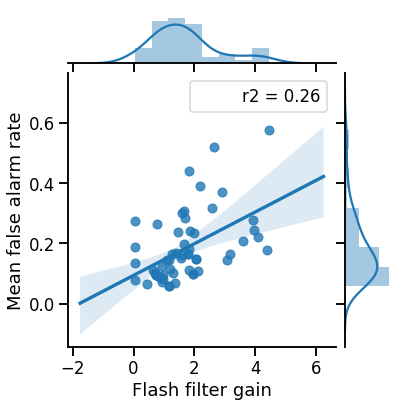

In [100]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x='flash_max', y='mean_false_alarm_rate', data=model_fits, kind='reg', stat_func=r2)
plt.xlabel('Flash filter gain')
plt.ylabel("Mean false alarm rate")

Text(11.25, 0.5, 'Fraction of miss trials')

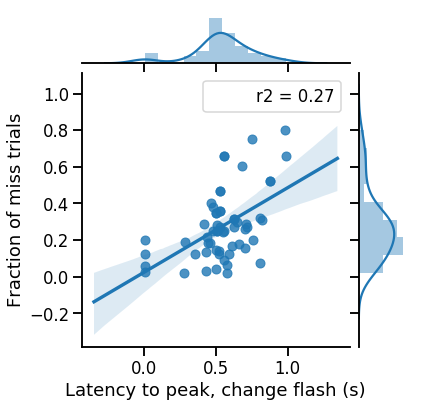

In [106]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x='cf_latency', y='normalized_misses', data=model_fits, kind='reg', stat_func=r2)
plt.xlabel('Latency to peak, change flash (s)')
plt.ylabel("Fraction of miss trials")

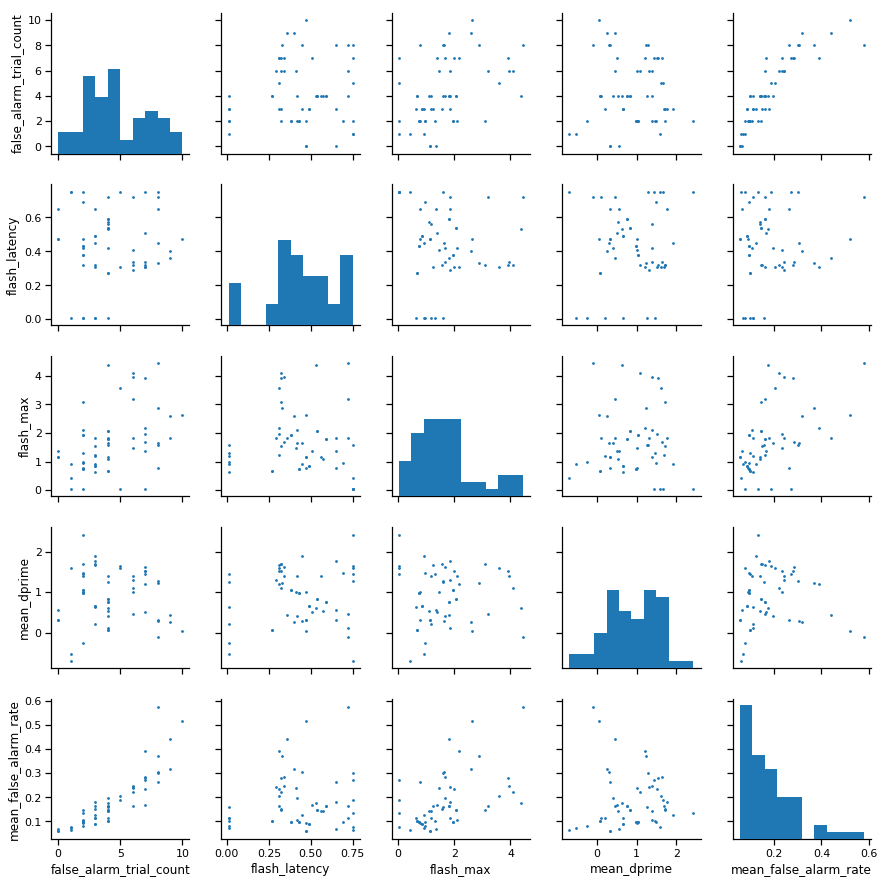

In [75]:
metrics = ['false_alarm_trial_count',
           'flash_latency',
           'flash_max',
           'mean_dprime',
           'mean_false_alarm_rate'] 
          

g = sns.PairGrid(model_fits, vars=metrics)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, s=3);
plt.show()

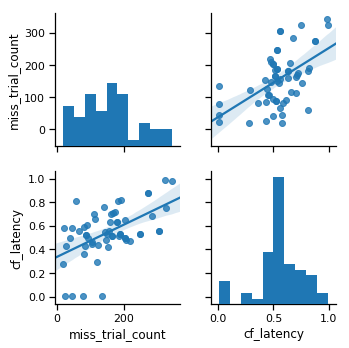

In [76]:
metrics = ['miss_trial_count',
           'cf_latency']

g = sns.PairGrid(model_fits, vars=metrics)
g.map_diag(plt.hist)
#g.map_offdiag(plt.scatter, s=3);
g.map_offdiag(sns.regplot);
plt.show()

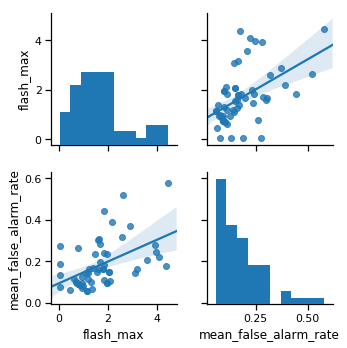

In [77]:
metrics = ['flash_max',
           'mean_false_alarm_rate']

g = sns.PairGrid(model_fits, vars=metrics)
g.map_diag(plt.hist)
#g.map_offdiag(plt.scatter, s=3);
g.map_offdiag(sns.regplot);
plt.show()

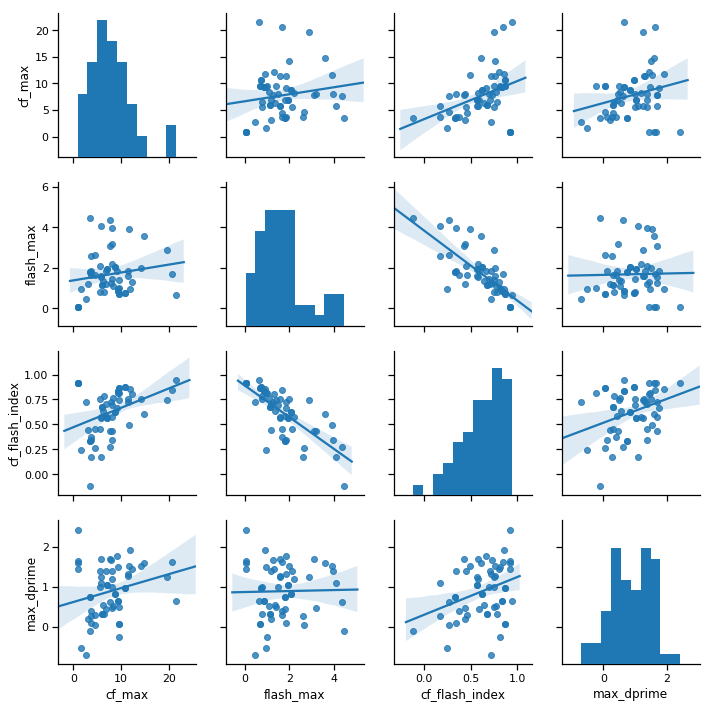

In [83]:
model_fits['cf_flash_index'] = (model_fits['cf_max'] - model_fits['flash_max']) / (model_fits['cf_max'] + model_fits['flash_max'])
metrics = ['cf_max',
           'flash_max',
           'cf_flash_index',
           'max_dprime']

g = sns.PairGrid(model_fits, vars=metrics)
g.map_diag(plt.hist)
g.map_offdiag(sns.regplot);
plt.show()

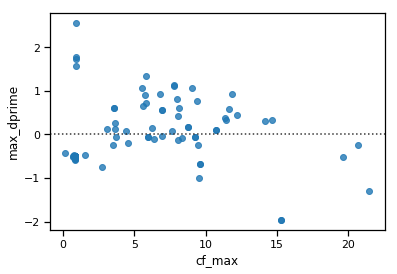

In [60]:
sns.residplot(x='cf_max', y='max_dprime', data=model_fits)

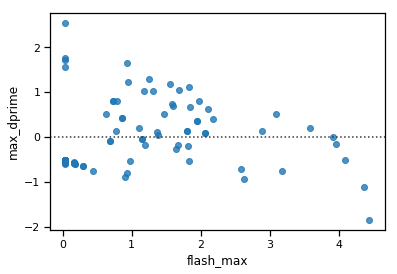

In [61]:
sns.residplot(x='flash_max', y='max_dprime', data=model_fits)

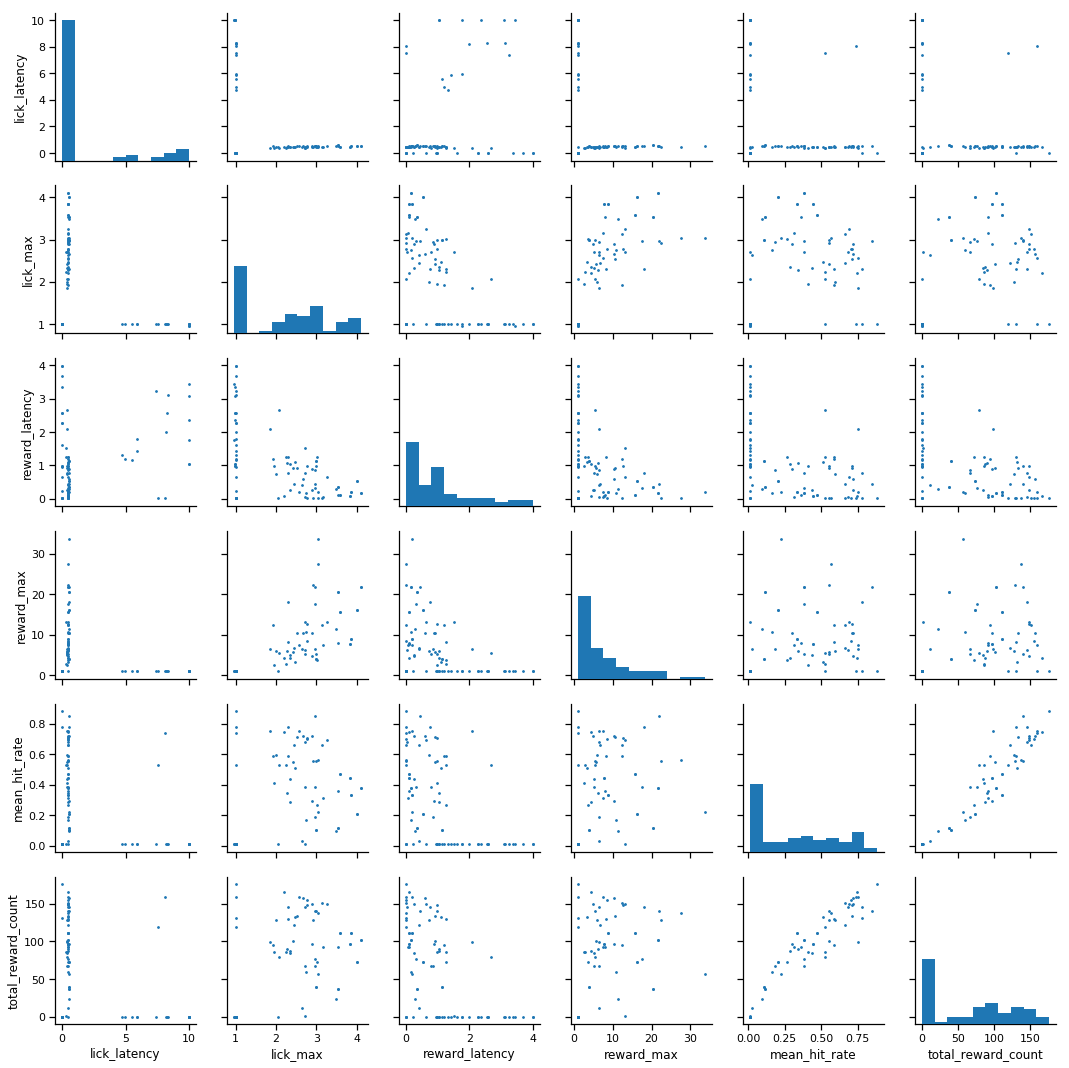

In [22]:
metrics = ['lick_latency',
           'lick_max',
          'reward_latency',
          'reward_max',
          'mean_hit_rate',
          'total_reward_count']

g = sns.PairGrid(model_fits, vars=metrics)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, s=3);
plt.show()

## Comparing with session type
For this we will need the names of the sessions.

In [24]:
model_fits['session_name'].unique()

In [26]:
model_fits['session_name_short'] = model_fits['session_name'].apply(lambda x: x.split('_')[-1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

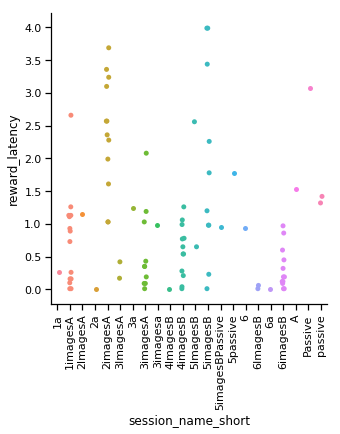

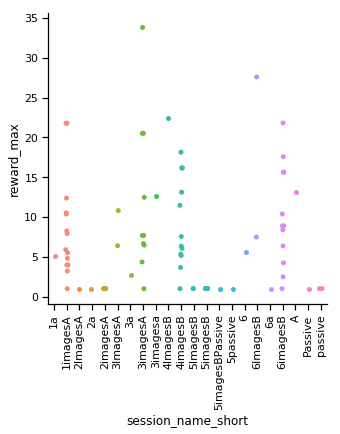

In [47]:
metrics = ['lick_latency', 'lick_max', 'reward_latency', 'reward_max',
  'flash_latency', 'flash_max', 'cf_latency', 'cf_max']

sns.catplot(x='session_name_short', y='reward_latency', data = model_fits.sort_values('session_name_short'))
plt.xticks(rotation=90)

#This should rather be a factorplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

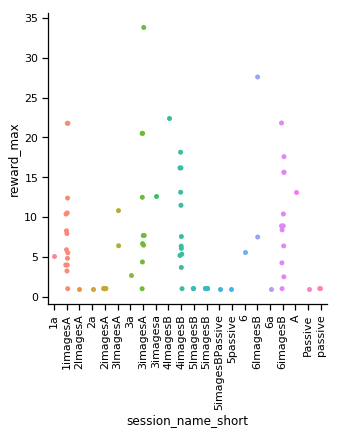

In [48]:
sns.catplot(x='session_name_short', y='reward_max', data = model_fits.sort_values('session_name_short'))
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

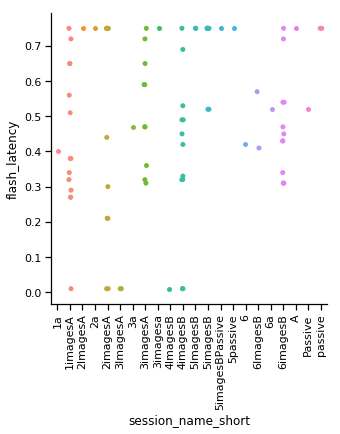

In [49]:
sns.catplot(x='session_name_short', y='flash_latency', data = model_fits.sort_values('session_name_short'))
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

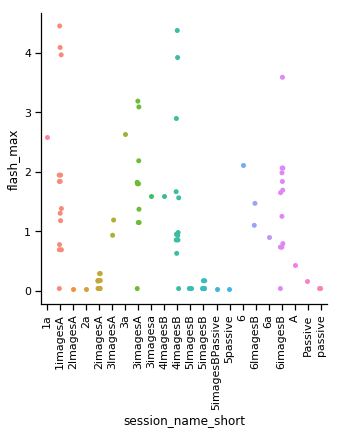

In [50]:
sns.catplot(x='session_name_short', y='flash_max', data = model_fits.sort_values('session_name_short'))
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

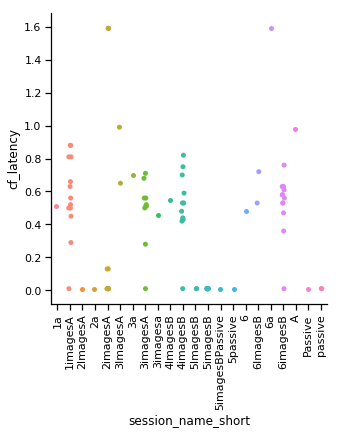

In [51]:
sns.catplot(x='session_name_short', y='cf_latency', data = model_fits.sort_values('session_name_short'))
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

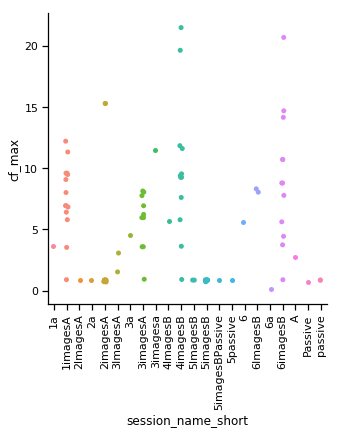

In [52]:
sns.catplot(x='session_name_short', y='cf_max', data = model_fits.sort_values('session_name_short'))
plt.xticks(rotation=90)